CODE: https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb#scrollTo=zWSRnQ0WI5eq

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.37714645, -0.0846091 , -0.2774145 , -0.52990466,  0.16662246,
        -0.08986625,  0.3686129 ,  0.05178931,  0.65212375,  0.23472162]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.12677297, 0.07988933, 0.06588013, 0.05117989, 0.10270634,
        0.07947045, 0.12569575, 0.09156424, 0.16689672, 0.1099442 ]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.53237

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2942 - accuracy: 0.9151
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1411 - accuracy: 0.9584
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1061 - accuracy: 0.9685
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0861 - accuracy: 0.9740
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0736 - accuracy: 0.9768


In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0757 - accuracy: 0.9758 - 634ms/epoch - 2ms/step


[0.07570440322160721, 0.9757999777793884]

In [ ]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [ ]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.6253349e-09, 1.2337717e-08, 1.2386206e-06, 2.0071608e-05,
        1.4645831e-13, 4.2316628e-08, 7.5085691e-16, 9.9997783e-01,
        2.8832069e-08, 8.4333618e-07],
       [4.3535304e-09, 2.4814252e-04, 9.9974698e-01, 7.4133357e-07,
        5.4557041e-15, 4.0960422e-06, 7.0338819e-09, 2.8244741e-13,
        8.7472031e-08, 5.4237680e-15],
       [2.6369761e-07, 9.9903488e-01, 6.8022295e-05, 4.3989257e-05,
        1.0132974e-04, 4.5278816e-06, 9.3566305e-06, 4.4682433e-04,
        2.8951067e-04, 1.3734870e-06],
       [9.9781704e-01, 5.5024358e-08, 1.8877226e-03, 8.6303589e-06,
        4.0469723e-07, 7.5989439e-05, 1.6013706e-04, 4.1732997e-05,
        2.5115276e-06, 5.8712890e-06],
       [2.6501590e-05, 3.9222425e-09, 2.7994112e-05, 2.8472007e-08,
        9.9506581e-01, 4.7331179e-07, 5.1425897e-05, 2.9807864e-04,
        4.4388853e-06, 4.5252461e-03]], dtype=float32)>

In [ ]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [ ]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Text(0.5, 0, 'dog-[5]')

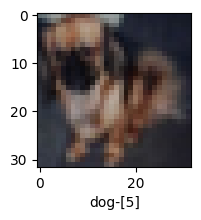

In [ ]:
i = np.random.randint(len(train_images))
plt.figure(figsize=(10,2))
plt.imshow(train_images[i])
plt.xlabel(label_names[int(train_labels[i])] + "-" + str(train_labels[i]))

In [ ]:
x_train = train_images/255
x_test = test_images/255
y_train_onehot = to_categorical(train_labels)
y_test_onehot = to_categorical(test_labels)

In [ ]:
lin = Sequential()
lin.add(Flatten(input_shape=(32,32,3)))
lin.add(Dense(1000))
lin.add(Dense(10, activation='softmax'))
lin.compile(optimizer='adam', \
                  loss='categorical_crossentropy', \
                  metrics=['accuracy'])
run_lin = lin.fit(x_train, y_train_onehot, epochs=20, validation_data=(x_test, y_test_onehot))

#returns the probability of 10 labels for each of 10,000 test samples:
y_pred_lin = lin.predict(x_test)

#picking the largest probability as the final predicted class:
y_pred_lin = np.argmax(y_pred_lin, axis=1)


Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 2.4627 - accuracy: 0.3014 - val_loss: 1.8101 - val_accuracy: 0.3586
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8857 - accuracy: 0.3338 - val_loss: 1.8769 - val_accuracy: 0.3332
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8964 - accuracy: 0.3334 - val_loss: 1.8525 - val_accuracy: 0.3544
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8753 - accuracy: 0.3443 - val_loss: 1.9469 - val_accuracy: 0.3194
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8796 - accuracy: 0.3453 - val_loss: 1.8043 - val_accuracy: 0.3648
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8667 - accuracy: 0.3483 - val_loss: 1.8902 - val_accuracy: 0.3380
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8517 - accuracy: 0.3575 - val_loss: 2.1627 - val_accuracy:

In [ ]:
print(metrics.classification_report(y_test, y_pred_lin))

              precision    recall  f1-score   support

           0       0.09      0.05      0.07       980
           1       0.11      0.14      0.12      1135
           2       0.11      0.01      0.02      1032
           3       0.08      0.09      0.09      1010
           4       0.10      0.18      0.13       982
           5       0.08      0.10      0.09       892
           6       0.10      0.14      0.11       958
           7       0.10      0.09      0.10      1028
           8       0.10      0.09      0.10       974
           9       0.08      0.05      0.06      1009

    accuracy                           0.09     10000
   macro avg       0.10      0.09      0.09     10000
weighted avg       0.10      0.09      0.09     10000

